In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


# Import Plotting Libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Model Libraries:

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer

## Import Data:

In [4]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')

In [5]:
X = train_df.drop(columns=['ID','y'])
y = train_df.y

In [6]:
train_features, val_features, train_labels, val_labels = train_test_split(X,
                                                                          y,
                                                                          test_size = 0.3,
                                                                          stratify = y,
                                                                          random_state = 42)

## Label Encoding:

In [7]:
le = LabelEncoder()
le.fit(train_labels)

LabelEncoder()

In [8]:
train_labels = le.transform(train_labels)
val_labels = le.transform(val_labels)

## Scalling the Data:

In [9]:
scaler = StandardScaler()
scaler.fit(train_features)

StandardScaler()

In [10]:
train_features = scaler.transform(train_features)
val_features = scaler.transform(val_features)

## Gridsearch:

In [11]:
f1 = make_scorer(f1_score , average = "weighted")

In [12]:
params_ada = {
    "n_estimators": [5, 10, 15, 20],
    "learning_rate": [0.4, 0.6, 0.8, 1.0]
}

gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)),
                      param_grid = params_ada, scoring = f1, cv = 4, n_jobs = -1)

gs_ada.fit(train_features, train_labels)

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                                                n_estimators=20,
                                                                                random_state=42)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15, 20]},
             scoring=make_scorer(f1_score, average=weighted))

In [13]:
gs_ada.cv_results_

{'mean_fit_time': array([ 2.8048346 ,  5.93588507,  8.95201516, 11.45053786,  2.85306442,
         5.69306552,  8.56057668, 11.81608033,  2.80322266,  5.71540225,
         8.59161156, 11.83577085,  2.8215915 ,  5.71281797,  8.47858477,
        11.57671428]),
 'std_fit_time': array([0.01099434, 0.0405085 , 0.17748965, 0.02747418, 0.01698206,
        0.01774388, 0.03631973, 0.14615298, 0.00642783, 0.03488327,
        0.01850216, 0.12137267, 0.02191633, 0.01384082, 0.02148042,
        0.11450758]),
 'mean_score_time': array([0.05801445, 0.11871481, 0.16980082, 0.2254476 , 0.05694562,
        0.11139488, 0.17424381, 0.22367436, 0.05730057, 0.11553794,
        0.17070651, 0.22789574, 0.05774474, 0.11354917, 0.16889042,
        0.17943341]),
 'std_score_time': array([0.00142188, 0.00731589, 0.00238237, 0.00460455, 0.00033971,
        0.00099626, 0.00621444, 0.00193062, 0.00106381, 0.00235225,
        0.00283582, 0.00191443, 0.00028011, 0.00102533, 0.00218547,
        0.02619277]),
 'param_le

In [14]:
gs_ada.best_params_

{'learning_rate': 0.8, 'n_estimators': 15}

## Training the Model:

In [15]:
ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42),
                         n_estimators = 15, learning_rate = 0.4, random_state = 42)

In [16]:
def classification_task(estimator, attributes, labels):
    """
    Function: "fit", "predict" and "score" values of an estimator.
    
    Parameters: estimator, attributes (X) and labels (y).
    
    Returns: model's performance measured as accuracy and f1_score.
    """
    estimator.fit(attributes, labels)
    predictions = estimator.predict(attributes)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

## Printing Scores:

In [17]:
classification_task(ada, train_features, train_labels)

Accuracy: 0.9730977185810366
F1 score: 0.9731492183458299


In [18]:
classification_task(ada, val_features, val_labels)

Accuracy: 0.9923100584435558
F1 score: 0.9923134863142836


## Plotting Confusion Matrix:

In [19]:
def plot_confusion_matrix(true_values, predicted_values):
    plt.figure(figsize = (8, 7))
    sns.heatmap(confusion_matrix(true_values, predicted_values),
                annot = True,
                fmt = ".0f",
                cmap = "coolwarm",
                linewidths = 2, 
                linecolor = "white",
                xticklabels = ada.classes_,
                yticklabels = ada.classes_)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion matrix on the testing data")
    plt.show()

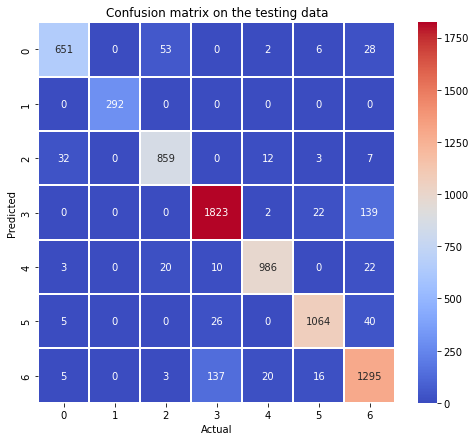

In [20]:
predicted = ada.predict(train_features)
plot_confusion_matrix(train_labels, predicted)

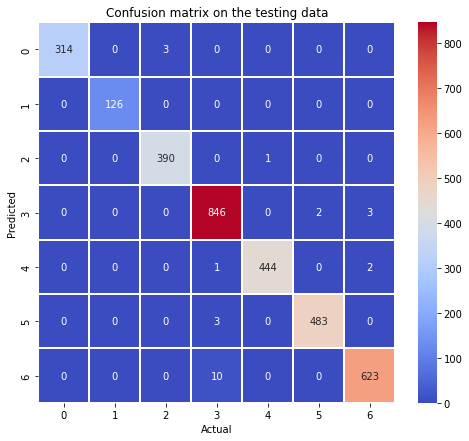

In [21]:
predicted = ada.predict(val_features)
plot_confusion_matrix(val_labels, predicted)

## Test Data:

In [22]:
test_data = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv')

In [23]:
X_test = scaler.transform(test_data.drop(columns=['ID']))

In [24]:
y_test_predicted = ada.predict(X_test)

y_test_predicted = le.inverse_transform(y_test_predicted)

test_data['y'] = y_test_predicted

test_data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [25]:
test_data[['ID', 'y']].to_csv('submission.csv', index=False)